In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
def gendummy_y(sizey,classes=4):
    return np.random.randint(classes, size=(sizey, 1))

In [3]:
def join_dfs(file,file2,postype='L',debug=True,window=50,trigger=0.02):
   
    df = pd.read_csv(file)
    df2 = pd.read_csv(file2)
 
    #trzeba jokos wyliczyc zmiane ilosciowa
    # np. procentowa zmiana wszystkich pozycji
    #Wyliczyc srednia z 100 ostatnich dni i na jej podstawie odniesc sie do wartosci
    df['ML_Lots']=df['LongLots'].rolling(window).mean()
    df['MS_Lots']=df['ShortLots'].rolling(window).mean()
    df['ML_Pos']=df['LongPos'].rolling(window).mean()
    df['MS_Pos']=df['ShortPos'].rolling(window).mean()
    
    df['%LL']=df['LongLots']/(df['ML_Lots']+df['MS_Lots'])
    df['%SL']=df['ShortLots']/(df['ML_Lots']+df['MS_Lots'])
    df['%LP']=df['LongPos']/(df['ML_Pos']+df['MS_Pos'])
    df['%SP']=df['ShortPos']/(df['ML_Pos']+df['MS_Pos'])
    df=df.dropna()
    for y in range(1,window+1):
            df['%LL_'+str(y)]=df['%LL'].shift(y)
            df['%SL'+str(y)]=df['%SL'].shift(y)
            df['%LP'+str(y)]=df['%LP'].shift(y)
            df['%SP'+str(y)]=df['%SP'].shift(y)
    
    
    for i in range(1,6):
        df['%C'+str(i)]=df['Current'].pct_change(periods=i)  
   
    df=df.sort_values(by='Date')
    for i in range(1,6):
        df['%C'+str(i)]=df['Current'].pct_change(periods=i)  
    df['Max']=df[["%C1", "%C2","%C3","%C4","%C5"]].max(axis=1)
    df['Min']=df[["%C1", "%C2","%C3","%C4","%C5"]].min(axis=1)
    if debug:
        print(f"postype={postype}")
    if postype=='S':
        df['y']=0
        df.loc[(df['Min'] <=-trigger), 'y'] = 3
        df.loc[(df['Max'] >=trigger/2 ), 'y'] = 1
        df.loc[(df['Max'] >=trigger/2 ) & (df['Min'] <=-trigger ), 'y'] = 2
        print("Counting Shorts")
    else:
        df['y']=0
        df.loc[(df['Min'] <=-trigger/2), 'y'] = 1
        df.loc[(df['Max'] >=trigger ), 'y'] = 3
        df.loc[(df['Max'] >=trigger ) & (df['Min'] <=-trigger/2 ), 'y'] = 2
        print("Counting Longs")
    
    df['y']=df['y'].shift(-5)
    print("Shift by 5")
    df=df.dropna()
    return df

In [4]:
w=100
p='S'
df_BRENT=join_dfs('MyFx\\BRENT.csv','MyFx\\brent_tt.csv',postype=p,window=w,trigger=0.02)
df_DAX=join_dfs('MyFx\\GER.csv','MyFx\\dax_tt.csv',postype=p,window=w,trigger=0.02)
df_GOLD=join_dfs('MyFx\\GOLD.csv','MyFx\\gold_tt.csv',postype=p,window=w,trigger=0.02)
df_NAS=join_dfs('MyFx\\NAS.csv','MyFx\\nas_tt.csv',postype=p,window=w,trigger=0.02)

df_USD_CHF=join_dfs('MyFx\\USD_CHF.csv','MyFx\\brent_tt.csv',postype=p,window=w,trigger=0.015)
df_EUR_USD=join_dfs('MyFx\\EUR_USD.csv','MyFx\\brent_tt.csv',postype=p,window=w,trigger=0.015)
df_USD_JPN=join_dfs('MyFx\\USD_JPN.csv','MyFx\\brent_tt.csv',postype=p,window=w,trigger=0.015)
df_GPB_USD=join_dfs('MyFx\\GPB_USD.csv','MyFx\\brent_tt.csv',postype=p,window=w,trigger=0.015)


postype=S
Counting Shorts
Shift by 5
postype=S
Counting Shorts
Shift by 5
postype=S
Counting Shorts
Shift by 5
postype=S
Counting Shorts
Shift by 5
postype=S
Counting Shorts
Shift by 5
postype=S
Counting Shorts
Shift by 5
postype=S
Counting Shorts
Shift by 5
postype=S
Counting Shorts
Shift by 5


In [25]:
df=df_DAX
#df=df.append(df_BRENT)
df=df.append(df_GOLD)
df=df.append(df_NAS)

#df=df.append(df_USD_CHF)
#df=df.append(df_EUR_USD)
#df=df.append(df_USD_JPN)
#df=df.append(df_GPB_USD)

df

,Date,DayofWeek,Open,High,Low,Current,ShortLots,LongLots,ShortPos,LongPos,...,%LP100,%SP100,%C1,%C2,%C3,%C4,%C5,Max,Min,y
199,2016-11-03,3,10320.0,10325.9,10204.2,10215.2,129.00,342.97,77,241,...,0.989238,0.239156,-0.008964,-0.015953,-0.028160,-0.043117,-0.041276,-0.008964,-0.043117,1.0
200,2016-11-06,6,10410.2,10472.2,10380.2,10471.7,80.07,369.03,54,262,...,0.816702,0.297474,0.025110,0.015920,0.008757,-0.003758,-0.019090,0.025110,-0.019090,1.0
201,2016-11-07,0,10443.7,10555.7,10415.7,10536.7,133.16,328.01,80,201,...,0.850926,0.360836,0.006207,0.031473,0.022226,0.015018,0.002426,0.031473,0.002426,1.0
202,2016-11-08,1,10039.7,10686.0,10033.7,10660.5,173.20,294.18,100,180,...,0.494597,0.392452,0.011749,0.018030,0.043592,0.034237,0.026944,0.043592,0.011749,0.0
203,2016-11-09,2,10706.5,10801.0,10578.0,10675.0,79.46,104.95,67,81,...,0.450426,0.445064,0.001360,0.013126,0.019414,0.045011,0.035644,0.045011,0.001360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,2019-12-30,0,8711.9,8752.8,8673.6,8752.5,182.49,45.93,296,109,...,0.386606,0.386606,0.004580,-0.000719,-0.003824,0.005203,0.005410,0.005410,-0.003824,0.0
978,2019-12-31,1,8754.6,8764.2,8750.2,8757.0,150.23,48.02,282,122,...,0.362491,0.368434,0.000514,0.005096,-0.000206,-0.003312,0.005719,0.005719,-0.003312,1.0
979,2020-01-01,2,8754.6,8880.3,8750.2,8880.2,139.69,9.60,201,83,...,0.380432,0.320989,0.014069,0.014590,0.019237,0.013860,0.010710,0.019237,0.010710,1.0
980,2020-01-02,3,8878.9,8886.5,8714.9,8792.4,192.96,38.08,315,69,...,0.468648,0.486445,-0.009887,0.004042,0.004559,0.009159,0.003836,0.009159,-0.009887,1.0


In [26]:
#X and y values

X=df.iloc[:,14:-8]
y=df.iloc[:,-1]

In [27]:
X

,%LL,%SL,%LP,%SP,%LL_1,%SL1,%LP1,%SP1,%LL_2,%SL2,...,%LP98,%SP98,%LL_99,%SL99,%LP99,%SP99,%LL_100,%SL100,%LP100,%SP100
199,0.913729,0.343677,0.928494,0.296656,0.892967,0.268072,0.897000,0.228116,0.771318,0.241049,...,0.850926,0.360836,0.528798,0.259477,0.816702,0.297474,0.890854,0.193328,0.989238,0.239156
200,0.975687,0.211699,1.005141,0.207166,0.913729,0.343677,0.928494,0.296656,0.892967,0.268072,...,0.494597,0.392452,0.562714,0.321842,0.850926,0.360836,0.528798,0.259477,0.816702,0.297474
201,0.860882,0.349486,0.769466,0.306255,0.975687,0.211699,1.005141,0.207166,0.913729,0.343677,...,0.450426,0.445064,0.352890,0.366351,0.494597,0.392452,0.562714,0.321842,0.850926,0.360836
202,0.765686,0.450801,0.686054,0.381141,0.860882,0.349486,0.769466,0.306255,0.975687,0.211699,...,0.411919,0.449366,0.385479,0.408384,0.450426,0.445064,0.352890,0.366351,0.494597,0.392452
203,0.273021,0.206710,0.308948,0.255550,0.765686,0.450801,0.686054,0.381141,0.860882,0.349486,...,0.155813,0.177305,0.312476,0.391822,0.411919,0.449366,0.385479,0.408384,0.450426,0.445064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0.304231,1.208778,0.429472,1.166273,0.263852,1.245391,0.358494,1.266680,0.083723,1.305186,...,0.380432,0.320989,0.327273,0.437871,0.362491,0.368434,0.177437,0.485098,0.386606,0.386606
978,0.316120,0.988977,0.475430,1.098944,0.304231,1.208778,0.429472,1.166273,0.263852,1.245391,...,0.468648,0.486445,0.427141,0.372976,0.380432,0.320989,0.327273,0.437871,0.362491,0.368434
979,0.063035,0.917222,0.321369,0.778255,0.316120,0.988977,0.475430,1.098944,0.304231,1.208778,...,0.456838,0.302581,0.282142,0.692766,0.468648,0.486445,0.427141,0.372976,0.380432,0.320989
980,0.248467,1.259040,0.264875,1.209213,0.063035,0.917222,0.321369,0.778255,0.316120,0.988977,...,0.679870,0.425658,0.120803,0.259796,0.456838,0.302581,0.282142,0.692766,0.468648,0.486445


In [28]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD,Adam,Adadelta

In [29]:
y = keras.utils.to_categorical(y,4)
y


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.

hl_nneurons=round((X.shape[1]+y.shape[1])/2)

model.add(Dense(hl_nneurons, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(hl_nneurons, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))
adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
ada=Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [32]:
r=model.fit(X_train, y_train,
             validation_data=(X_test,y_test),
          epochs=500,
          batch_size=128)

Train on 1883 samples, validate on 471 samples
Epoch 1/500
1883/1883 [==============================] - 1s 616us/sample - loss: 1.5219 - accuracy: 0.4121 - val_loss: 1.0812 - val_accuracy: 0.5096
Epoch 2/500
1883/1883 [==============================] - 0s 68us/sample - loss: 1.2272 - accuracy: 0.4668 - val_loss: 1.0537 - val_accuracy: 0.4968
Epoch 3/500
1883/1883 [==============================] - 0s 61us/sample - loss: 1.1165 - accuracy: 0.4960 - val_loss: 1.0365 - val_accuracy: 0.5053
Epoch 4/500
1883/1883 [==============================] - 0s 59us/sample - loss: 1.0660 - accuracy: 0.4918 - val_loss: 1.0268 - val_accuracy: 0.4968
Epoch 5/500
1883/1883 [==============================] - 0s 62us/sample - loss: 1.0196 - accuracy: 0.5194 - val_loss: 1.0079 - val_accuracy: 0.5265
Epoch 6/500
1883/1883 [==============================] - 0s 62us/sample - loss: 1.0128 - accuracy: 0.5162 - val_loss: 0.9938 - val_accuracy: 0.5329
Epoch 7/500
1883/1883 [==============================] - 0s 59us

Epoch 56/500
1883/1883 [==============================] - 0s 67us/sample - loss: 0.4005 - accuracy: 0.8332 - val_loss: 0.9173 - val_accuracy: 0.6561
Epoch 57/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.3868 - accuracy: 0.8497 - val_loss: 0.9491 - val_accuracy: 0.6624
Epoch 58/500
1883/1883 [==============================] - 0s 56us/sample - loss: 0.3739 - accuracy: 0.8407 - val_loss: 0.9955 - val_accuracy: 0.6497
Epoch 59/500
1883/1883 [==============================] - 0s 59us/sample - loss: 0.3698 - accuracy: 0.8513 - val_loss: 1.0156 - val_accuracy: 0.6497
Epoch 60/500
1883/1883 [==============================] - 0s 61us/sample - loss: 0.3592 - accuracy: 0.8502 - val_loss: 1.0125 - val_accuracy: 0.6412
Epoch 61/500
1883/1883 [==============================] - 0s 67us/sample - loss: 0.3626 - accuracy: 0.8455 - val_loss: 0.9731 - val_accuracy: 0.6539
Epoch 62/500
1883/1883 [==============================] - 0s 64us/sample - loss: 0.3516 - accuracy: 0.8603

Epoch 111/500
1883/1883 [==============================] - 0s 58us/sample - loss: 0.1824 - accuracy: 0.9304 - val_loss: 1.4082 - val_accuracy: 0.6667
Epoch 112/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.1893 - accuracy: 0.9326 - val_loss: 1.4408 - val_accuracy: 0.6412
Epoch 113/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.2059 - accuracy: 0.9251 - val_loss: 1.3933 - val_accuracy: 0.6476
Epoch 114/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.1984 - accuracy: 0.9198 - val_loss: 1.3852 - val_accuracy: 0.6624
Epoch 115/500
1883/1883 [==============================] - 0s 57us/sample - loss: 0.2234 - accuracy: 0.9198 - val_loss: 1.3985 - val_accuracy: 0.6454
Epoch 116/500
1883/1883 [==============================] - 0s 59us/sample - loss: 0.1859 - accuracy: 0.9310 - val_loss: 1.3684 - val_accuracy: 0.6369
Epoch 117/500
1883/1883 [==============================] - 0s 59us/sample - loss: 0.1922 - accuracy:

Epoch 220/500
1883/1883 [==============================] - 0s 70us/sample - loss: 0.0745 - accuracy: 0.9750 - val_loss: 2.1728 - val_accuracy: 0.6369
Epoch 221/500
1883/1883 [==============================] - 0s 66us/sample - loss: 0.0685 - accuracy: 0.9745 - val_loss: 2.1061 - val_accuracy: 0.6539
Epoch 222/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.0790 - accuracy: 0.9745 - val_loss: 2.2654 - val_accuracy: 0.6539
Epoch 223/500
1883/1883 [==============================] - 0s 64us/sample - loss: 0.0801 - accuracy: 0.9692 - val_loss: 2.2107 - val_accuracy: 0.6497
Epoch 224/500
1883/1883 [==============================] - 0s 64us/sample - loss: 0.0779 - accuracy: 0.9788 - val_loss: 2.2248 - val_accuracy: 0.6497
Epoch 225/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.0637 - accuracy: 0.9798 - val_loss: 2.2737 - val_accuracy: 0.6561
Epoch 226/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.0852 - accuracy:

Epoch 329/500
1883/1883 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.98 - 0s 62us/sample - loss: 0.0365 - accuracy: 0.9883 - val_loss: 2.4649 - val_accuracy: 0.6433
Epoch 330/500
1883/1883 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.98 - 0s 64us/sample - loss: 0.0350 - accuracy: 0.9873 - val_loss: 2.4799 - val_accuracy: 0.6476
Epoch 331/500
1883/1883 [==============================] - 0s 63us/sample - loss: 0.0563 - accuracy: 0.9804 - val_loss: 2.4568 - val_accuracy: 0.6412
Epoch 332/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.0580 - accuracy: 0.9830 - val_loss: 2.5229 - val_accuracy: 0.6497
Epoch 333/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.0465 - accuracy: 0.9862 - val_loss: 2.5139 - val_accuracy: 0.6645
Epoch 334/500
1883/1883 [==============================] - 0s 61us/sample - loss: 0.0414 - accuracy: 0.9851 - val_loss: 2.6514 - val_accuracy: 0.6582
Epoch 335/500
18

1883/1883 [==============================] - 0s 57us/sample - loss: 0.0352 - accuracy: 0.9894 - val_loss: 2.8795 - val_accuracy: 0.6603
Epoch 438/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.0479 - accuracy: 0.9851 - val_loss: 2.8197 - val_accuracy: 0.6603
Epoch 439/500
1883/1883 [==============================] - 0s 64us/sample - loss: 0.0468 - accuracy: 0.9857 - val_loss: 2.7382 - val_accuracy: 0.6561
Epoch 440/500
1883/1883 [==============================] - 0s 62us/sample - loss: 0.0443 - accuracy: 0.9846 - val_loss: 2.9068 - val_accuracy: 0.6645
Epoch 441/500
1883/1883 [==============================] - 0s 60us/sample - loss: 0.0335 - accuracy: 0.9883 - val_loss: 2.8762 - val_accuracy: 0.6497
Epoch 442/500
1883/1883 [==============================] - 0s 66us/sample - loss: 0.0521 - accuracy: 0.9809 - val_loss: 2.9185 - val_accuracy: 0.6412
Epoch 443/500
1883/1883 [==============================] - 0s 64us/sample - loss: 0.0623 - accuracy: 0.9804 - val_

Epoch 492/500
1883/1883 [==============================] - 0s 65us/sample - loss: 0.0342 - accuracy: 0.9846 - val_loss: 2.9688 - val_accuracy: 0.6433
Epoch 493/500
1883/1883 [==============================] - 0s 62us/sample - loss: 0.0331 - accuracy: 0.9894 - val_loss: 2.9501 - val_accuracy: 0.6369
Epoch 494/500
1883/1883 [==============================] - 0s 67us/sample - loss: 0.0355 - accuracy: 0.9899 - val_loss: 2.9142 - val_accuracy: 0.6582
Epoch 495/500
1883/1883 [==============================] - 0s 63us/sample - loss: 0.0389 - accuracy: 0.9878 - val_loss: 2.9603 - val_accuracy: 0.6603
Epoch 496/500
1883/1883 [==============================] - 0s 59us/sample - loss: 0.0302 - accuracy: 0.9894 - val_loss: 2.9860 - val_accuracy: 0.6518
Epoch 497/500
1883/1883 [==============================] - 0s 65us/sample - loss: 0.0267 - accuracy: 0.9936 - val_loss: 2.9331 - val_accuracy: 0.6603
Epoch 498/500
1883/1883 [==============================] - 0s 63us/sample - loss: 0.0250 - accuracy:

In [33]:
score,acc = model.evaluate(X_test, y_test, batch_size=128)

471/471 [==============================] - 0s 33us/sample - loss: 3.0367 - accuracy: 0.6433


In [34]:
score,acc

(3.036677713859866, 0.6433121)

In [35]:
from collections import defaultdict
#predicted=np.zeros(630)
#tested=np.zeros(630)
y_pred = model.predict(X_test)
predicted=np.zeros(len(y_pred))
tested=np.zeros(len(y_pred))
for i in range(len(y_pred)):
  
    predicted[i]=np.argmax(y_pred[i])
    tested[i]=np.argmax(y_test[i])


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(tested,predicted))
print(classification_report(tested,predicted))
a,b,c,d,=confusion_matrix(tested,predicted)
a[3],b[3],d[3],c[3]

[[138  57   0   2]
 [ 48 143   3   6]
 [  2   3   1   1]
 [ 30  14   2  21]]
              precision    recall  f1-score   support

         0.0       0.63      0.70      0.67       197
         1.0       0.66      0.71      0.69       200
         2.0       0.17      0.14      0.15         7
         3.0       0.70      0.31      0.43        67

    accuracy                           0.64       471
   macro avg       0.54      0.47      0.48       471
weighted avg       0.65      0.64      0.63       471



(2, 6, 21, 1)

In [37]:
prec=round((2*d[3]-a[3]*0.5-b[3]-c[3])/(a[3]+b[3]+c[3]+d[3]),4)

prec,d[3]/sum(d),d[3]/(a[3]+b[3]+c[3]+d[3])
#(2*a[0]-b[0]*0.5-c[0]-d[0])/sum(a)
#prec=int(round(prec,5)*1000)
#prec

(1.1333, 0.31343283582089554, 0.7)

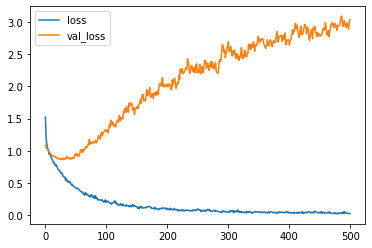

In [38]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

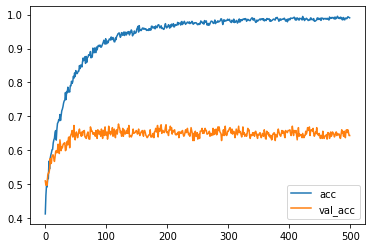

In [39]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()


In [40]:

prec=int(round(prec,5)*1000)
prec
'''
from joblib import dump,load
dump(model,'AI\\AI_'+p+'_d_'+str(prec)+'_model.joblib')
dump(sc,'AI\\AI_'+p+'_d_'+str(prec)+'_scaler.joblib')
prec=int(round(prec,5)*1000)
prec
'''
from joblib import dump,load
dump(sc,'AI\\AI_'+p+'_d_'+str(prec)+'_scaler.joblib')
model.save('AI\\AI_'+p+'_d_'+str(prec)+'_model.h5') 